In [1]:
# This is the template for the submission. You can develop your algorithm in a regular Python script and copy the code here for submission.

# TEAM NAME ON KAGGLE
# "EXAMPLE_GROUP"

# GROUP NUMBER
# "group_XX"

# TEAM MEMBERS (E-MAIL, LEGI, KAGGLE USERNAME):
# "examplestudent1@ethz.ch", "12-345-678", "eXampl3stdNtone" 
# "examplestudent2@ethz.ch", "12-345-679", "xXexamplestudent2Xx"
# "examplestudent3@ethz.ch", "12-345-670", "mhealth_student_98"

In [2]:
from os import listdir
from os.path import isfile, join
import re

import pandas as pd
import numpy as np

# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording
import matplotlib.pyplot as plt

# For interactive graphs
# %matplotlib widget

In [74]:
# Get the path for all test traces
'''
dir_traces_test = 'data/test'
filenames_test = [join(dir_traces_test, f) for f in listdir(dir_traces_test) if isfile(join(dir_traces_test, f))]
filenames_test.sort()
recordings_test = []
for fn in filenames_test:
    rec = Recording(fn)
    match = re.search(r'(\d{3})\.pkl$', fn)
    if match:
        id = int(match.group(1))
        rec.id = id
    else:
        raise ValueError(f'Filename {fn} does not match expected format')
    recordings_test.append(rec)
'''
    
    
dir_traces_train = 'data/train'
filenames_train = [join(dir_traces_train, f) for f in listdir(dir_traces_train) if isfile(join(dir_traces_train, f))]
filenames_train.sort()
axs = []
ays = []
azs = []
paxs = []
pays = []
pazs = []
for fn in filenames_train:
    rec = Recording(fn)
    #print(rec.data)
    
    axs.append(rec.data['ax'].values)
    ays.append(rec.data['ay'].values)
    azs.append(rec.data['az'].values)
    paxs.append(rec.data['phone_ax'].values)
    pays.append(rec.data['phone_ay'].values)
    pazs.append(rec.data['phone_az'].values)

In [52]:
from scipy.signal import argrelextrema, find_peaks
def centered_moving_average(data, window_size):
    ret = np.cumsum(data, dtype=float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    return ret[window_size - 1:] / window_size
def plot_array(arr):
    plt.figure(figsize=(25, 3))
    plt.plot(arr)
    plt.show()

def windowed_peak_detection(data, window_size):
    # Initialize an empty list to store the peaks
    peaks = []

    # Divide the data into windows
    for i in range(0, len(data), window_size):
        window = data[i:i + window_size]

        # Compute the relative maxima of the window
        window_peaks = argrelextrema(window, np.greater)

        # Add the indices of the peaks to the list
        peaks.extend(window_peaks[0] + i)

    return np.array(peaks)

def get_steps_from_peaks(data, peaks, threshold=1.25):
    steps=0
    for peak in peaks:
        if data[peak]>threshold:
            steps+=1
    return steps

def get_steps(data, window_size=80, threshold=1.25):
    peaks, _ = find_peaks(data, height=1.25, distance=80)
    steps = get_steps_from_peaks(data, peaks, threshold)
    return steps

with open('indices.txt', 'r') as f:
    indices = [line.rstrip() for line in f]

In [43]:
rec = Recording(filenames_train[0])
fnshuff = np.random.permutation(filenames_train)
for fn in fnshuff:
    rec = Recording(fn)
    if not (rec.labels['step_count'] == None):
        break
rec

Recording(filename='train_trace_228.pkl', labels={'path_idx': 1, 'activities': [1, 3], 'step_count': 147, 'watch_loc': 0}, data={'altitude': Trace(title='altitude', total_time=383.89, samplerate=12.51, max_update_gap=381.73), 'ax': Trace(title='ax', total_time=383.89, samplerate=200.10, max_update_gap=0.58), 'ay': Trace(title='ay', total_time=383.89, samplerate=200.10, max_update_gap=1.16), 'az': Trace(title='az', total_time=383.89, samplerate=200.10, max_update_gap=1.16), 'bearing': Trace(title='bearing', total_time=383.89, samplerate=12.51, max_update_gap=381.73), 'gx': Trace(title='gx', total_time=383.89, samplerate=200.10, max_update_gap=0.58), 'gy': Trace(title='gy', total_time=383.89, samplerate=200.10, max_update_gap=0.58), 'gz': Trace(title='gz', total_time=383.89, samplerate=200.10, max_update_gap=1.16), 'latitude': Trace(title='latitude', total_time=383.89, samplerate=12.51, max_update_gap=381.73), 'longitude': Trace(title='longitude', total_time=383.89, samplerate=12.51, max

In [73]:
type(axs)

list

In [75]:
'''acc_mags = []
for idx in indices:
    mag = np.sqrt(axs[int(idx)]**2 + ays[int(idx)]**2 + azs[int(idx)]**2)
    acc_mags.append(mag)
max_len = 0
idx = -1
for i,mag in enumerate(axs):
    if len(mag) > max_len:
        max_len = len(mag)
        idx = i
max_len,idx #idx = 228

#rec = Recording(filenames_train[236])'''
len(axs)


396

Trace(title='ax', total_time=383.89, samplerate=200.10, max_update_gap=0.58)


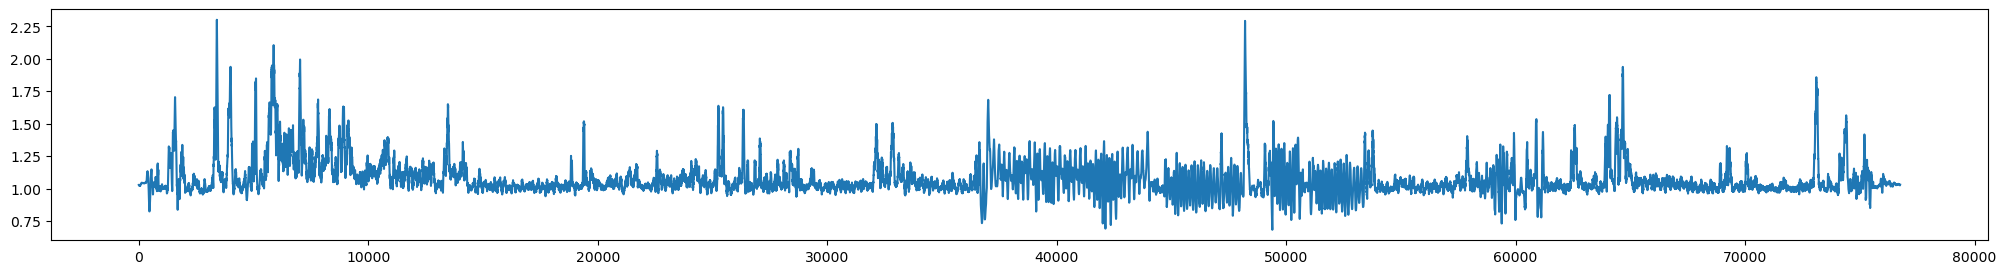

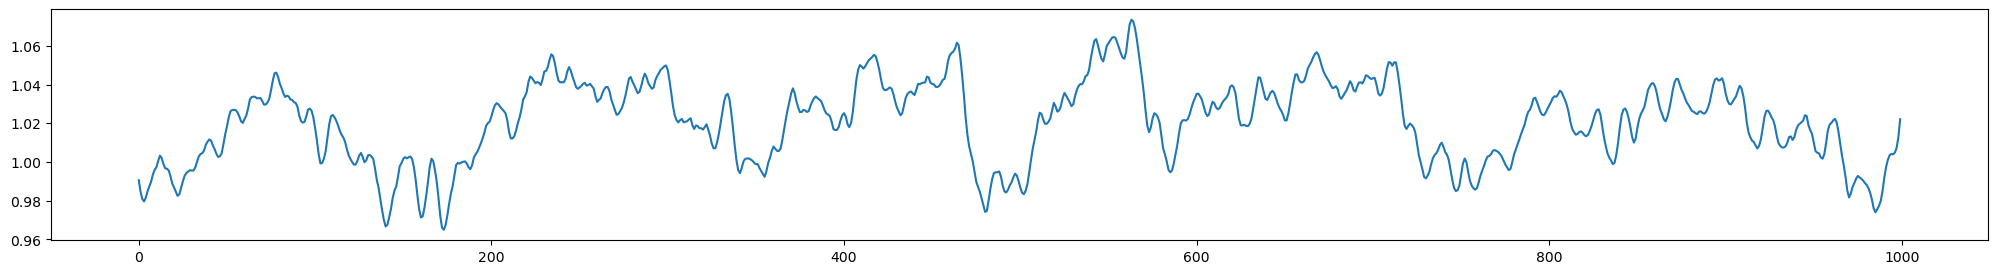

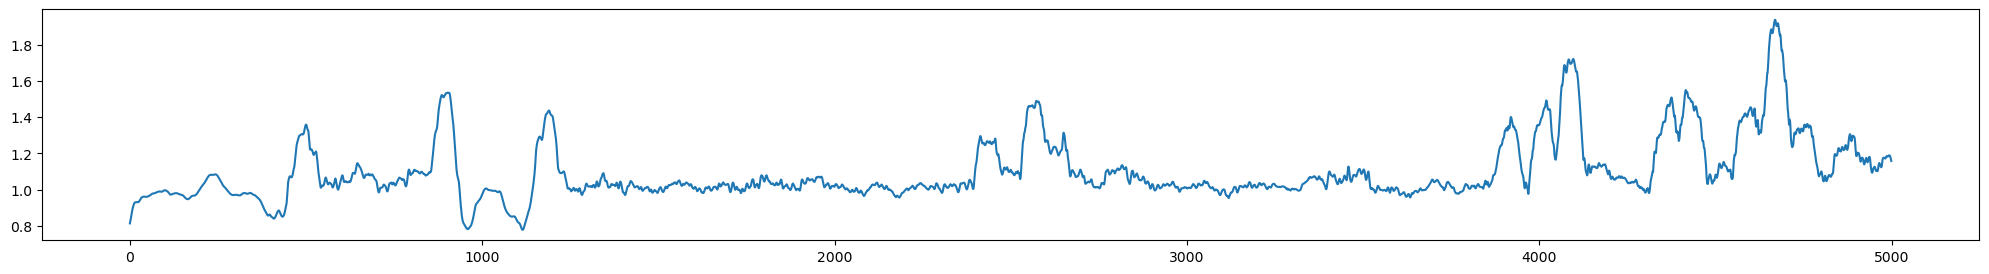

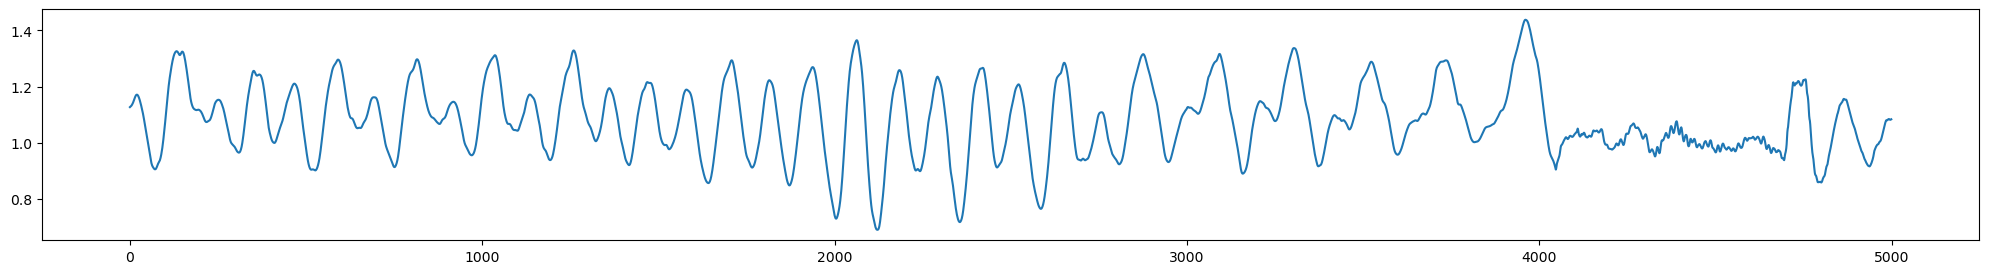

24


In [46]:

print(rec.data['ax'])
acc_mag = np.sqrt(rec.data['ax'].values**2 + rec.data['ay'].values**2 + rec.data['az'].values**2)
cen_mov_avg = centered_moving_average(acc_mag, 62)
acc_mag_phone = np.sqrt(rec.data['phone_ax'].values**2 + rec.data['phone_ay'].values**2 + rec.data['phone_az'].values**2)
cen_mov_avg_phone = centered_moving_average(acc_mag_phone, 62)
#peaks = windowed_peak_detection(cen_mov_avg[:40000], 118) #window from paper = 118
peaks, _ = find_peaks(cen_mov_avg[:40000], height=1.5, distance=80)
plot_array(cen_mov_avg[:])
plot_array(cen_mov_avg[31000:32000])
plot_array(cen_mov_avg[60000:65000])
plot_array(cen_mov_avg[40000:45000])
print(get_steps_from_peaks(cen_mov_avg[:40000], peaks, 1.5))



In [48]:
steps_pred = []
steps_true = []
for i, fn in enumerate(filenames_train):
    rec = Recording(fn)
    if not (rec.labels['step_count'] == None):
        acc_mag = np.sqrt(rec.data['ax'].values**2 + rec.data['ay'].values**2 + rec.data['az'].values**2)
        cen_mov_avg = centered_moving_average(acc_mag, 62)
        peaks, _ = find_peaks(cen_mov_avg[:40000], height=1.5, distance=80)
        steps = get_steps_from_peaks(cen_mov_avg[:40000], peaks, 1.5)
        steps_pred.append(steps)
        steps_true.append(rec.labels['step_count'])
        print(f'proecessed {i} out of {len(filenames_train)}')
diff = np.array(steps_pred) - np.array(steps_true)
print(f'Mean absolute error: {np.mean(np.abs(diff))}')

proecessed 14 out of 396
proecessed 15 out of 396
proecessed 17 out of 396
proecessed 18 out of 396
proecessed 19 out of 396
proecessed 30 out of 396
proecessed 46 out of 396
proecessed 74 out of 396
proecessed 82 out of 396
proecessed 147 out of 396
proecessed 165 out of 396
proecessed 178 out of 396
proecessed 184 out of 396
proecessed 190 out of 396
proecessed 201 out of 396
proecessed 228 out of 396
proecessed 236 out of 396
proecessed 237 out of 396
proecessed 242 out of 396
proecessed 245 out of 396
proecessed 252 out of 396
proecessed 274 out of 396
proecessed 300 out of 396
proecessed 308 out of 396
proecessed 312 out of 396
proecessed 313 out of 396
proecessed 315 out of 396
proecessed 341 out of 396
proecessed 361 out of 396
proecessed 369 out of 396
proecessed 374 out of 396
proecessed 381 out of 396
proecessed 388 out of 396
Mean absolute error: 281.93939393939394


In [51]:
indices = []
for i, fn in enumerate(filenames_train):
    rec = Recording(fn)
    if not (rec.labels['step_count'] == None):
        indices.append(i)
        
with open('indices.txt', 'w') as f:
    for index in indices:
        f.write('%s\n' % index)

In [7]:

'''pd.DataFrame(axs).to_csv('axs.csv')
axs = 0
pd.DataFrame(ays).to_csv('ays.csv')
ays = 0
pd.DataFrame(azs).to_csv('azs.csv')
azs = 0
pd.DataFrame(gxs).to_csv('gxs.csv')
gxs = 0
pd.DataFrame(gys).to_csv('gys.csv')
gys = 0
pd.DataFrame(gzs).to_csv('gzs.csv')
gzs = 0
pd.DataFrame(mxs).to_csv('mxs.csv')
mxs = 0
pd.DataFrame(mys).to_csv('mys.csv')
mys = 0
pd.DataFrame(mzs).to_csv('mzs.csv')
mzs = 0
pd.DataFrame(temps).to_csv('temps.csv')
temps = 0
pd.DataFrame(alts).to_csv('alts.csv')
alts = 0
pd.DataFrame(paxs).to_csv('paxs.csv')
paxs = 0
pd.DataFrame(pays).to_csv('pays.csv')
pays = 0
pd.DataFrame(pazs).to_csv('pazs.csv')
pazs = 0
pd.DataFrame(pgxs).to_csv('pgxs.csv')
pgxs = 0
pd.DataFrame(pgys).to_csv('pgys.csv')
pgys = 0
pd.DataFrame(pgzs).to_csv('pgzs.csv')
pgzs = 0
pd.DataFrame(pmxs).to_csv('pmxs.csv')
pmxs = 0
pd.DataFrame(pmys).to_csv('pmys.csv')
pmys = 0
pd.DataFrame(pmzs).to_csv('pmzs.csv')
pmzs = 0'''

"pd.DataFrame(axs).to_csv('axs.csv')\naxs = 0\npd.DataFrame(ays).to_csv('ays.csv')\nays = 0\npd.DataFrame(azs).to_csv('azs.csv')\nazs = 0\npd.DataFrame(gxs).to_csv('gxs.csv')\ngxs = 0\npd.DataFrame(gys).to_csv('gys.csv')\ngys = 0\npd.DataFrame(gzs).to_csv('gzs.csv')\ngzs = 0\npd.DataFrame(mxs).to_csv('mxs.csv')\nmxs = 0\npd.DataFrame(mys).to_csv('mys.csv')\nmys = 0\npd.DataFrame(mzs).to_csv('mzs.csv')\nmzs = 0\npd.DataFrame(temps).to_csv('temps.csv')\ntemps = 0\npd.DataFrame(alts).to_csv('alts.csv')\nalts = 0\npd.DataFrame(paxs).to_csv('paxs.csv')\npaxs = 0\npd.DataFrame(pays).to_csv('pays.csv')\npays = 0\npd.DataFrame(pazs).to_csv('pazs.csv')\npazs = 0\npd.DataFrame(pgxs).to_csv('pgxs.csv')\npgxs = 0\npd.DataFrame(pgys).to_csv('pgys.csv')\npgys = 0\npd.DataFrame(pgzs).to_csv('pgzs.csv')\npgzs = 0\npd.DataFrame(pmxs).to_csv('pmxs.csv')\npmxs = 0\npd.DataFrame(pmys).to_csv('pmys.csv')\npmys = 0\npd.DataFrame(pmzs).to_csv('pmzs.csv')\npmzs = 0"

In [8]:
# Loop through all filenames to process recordings
filenames_test = []
submission = []
for filename in filenames_test:
    recording = Recording(filename)
    
    # Assumes filename format ends with a three-digit ID before ".pkl"
    match = re.search(r'(\d{3})\.pkl$', filename)
    if match:
        id = int(match.group(1))
        recording.id = id
    else:
        raise ValueError(f'Filename {filename} does not match expected format')

    # Placeholder for the algorithm to process the recording
    # Implement the logic to infer watch location, path index, step count,
    # and activities (standing, walking, running, cycling) here.
    # Ensure your algorithm is tolerant to missing data and does not crash
    # when optional smartphone data traces are missing.

    path_idx = 0  # Integer, path in {0, 1, 2, 3, 4}
    watch_loc = 0  # Integer, 0: left wrist, 1: belt, 2: right ankle
    standing = False  # Boolean, True if participant was standing still throughout the recording
    walking = False  # Boolean, True if participant was walking throughout the recording
    running = False  # Boolean, True if participant was running throughout the recording
    cycling = False  # Boolean, True if participant was cycling throughout the recording
    step_count = 0  # Integer, number of steps, must be provided for each recording

    predictions = {
        'Id': id, 
        'watch_loc': watch_loc, 
        'path_idx': path_idx,
        'standing': standing,
        'walking': walking,
        'running': running,
        'cycling': cycling,
        'step_count': step_count
        }

    submission.append(predictions)

In [9]:
# Write the predicted values into a .csv file to then upload the .csv file to Kaggle
# When cross-checking the .csv file on your computer, we recommend using a text editor and NOT excel so that the results are displayed correctly
# IMPORTANT: Do NOT change the name of the columns of the .csv file ("Id", "watch_loc", "path_idx", "standing", "walking", "running", "cycling", "step_count")
submission_df = pd.DataFrame(submission, columns=['Id', 'watch_loc', 'path_idx', 'standing', 'walking', 'running', 'cycling', 'step_count'])
submission_df.to_csv('submission.csv', index=False)